## <i> Machine Learning Techniques For Detecting Chronic Kidney Disease </i>

#### <i> Import Librrary Files  </i>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


### <i> Dataset Overview </i>

  df.info()

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

### <i> Handling Missing Values </i>

In [6]:
# Step 1: Handling missing values
# For numerical columns, we will use mean imputation
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [7]:
# For categorical columns, we will use the most frequent value for imputation
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

In [8]:
# Imputing missing numerical values with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [9]:
# Imputing missing categorical values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

### <i> Encoding categorical variables </i> 

In [10]:
# Label encoding for binary categorical features
label_enc_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

In [11]:
# Apply LabelEncoder to each binary categorical column
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])


### <i>Converting object types to numerical (for 'pcv', 'wc', 'rc') </i>

In [12]:
# Convert 'pcv', 'wc', 'rc' to numeric (since they are stored as objects but represent numbers)
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Impute any missing values in these columns after conversion
df[['pcv', 'wc', 'rc']] = num_imputer.fit_transform(df[['pcv', 'wc', 'rc']])


### <i> Feature Scaling </i>


In [13]:
# Standardizing the numerical features
scaler = StandardScaler()
df[num_cols + ['pcv', 'wc', 'rc']] = scaler.fit_transform(df[num_cols + ['pcv', 'wc', 'rc']])


### <i> Expolatory Data Analysis (EDA)</i>

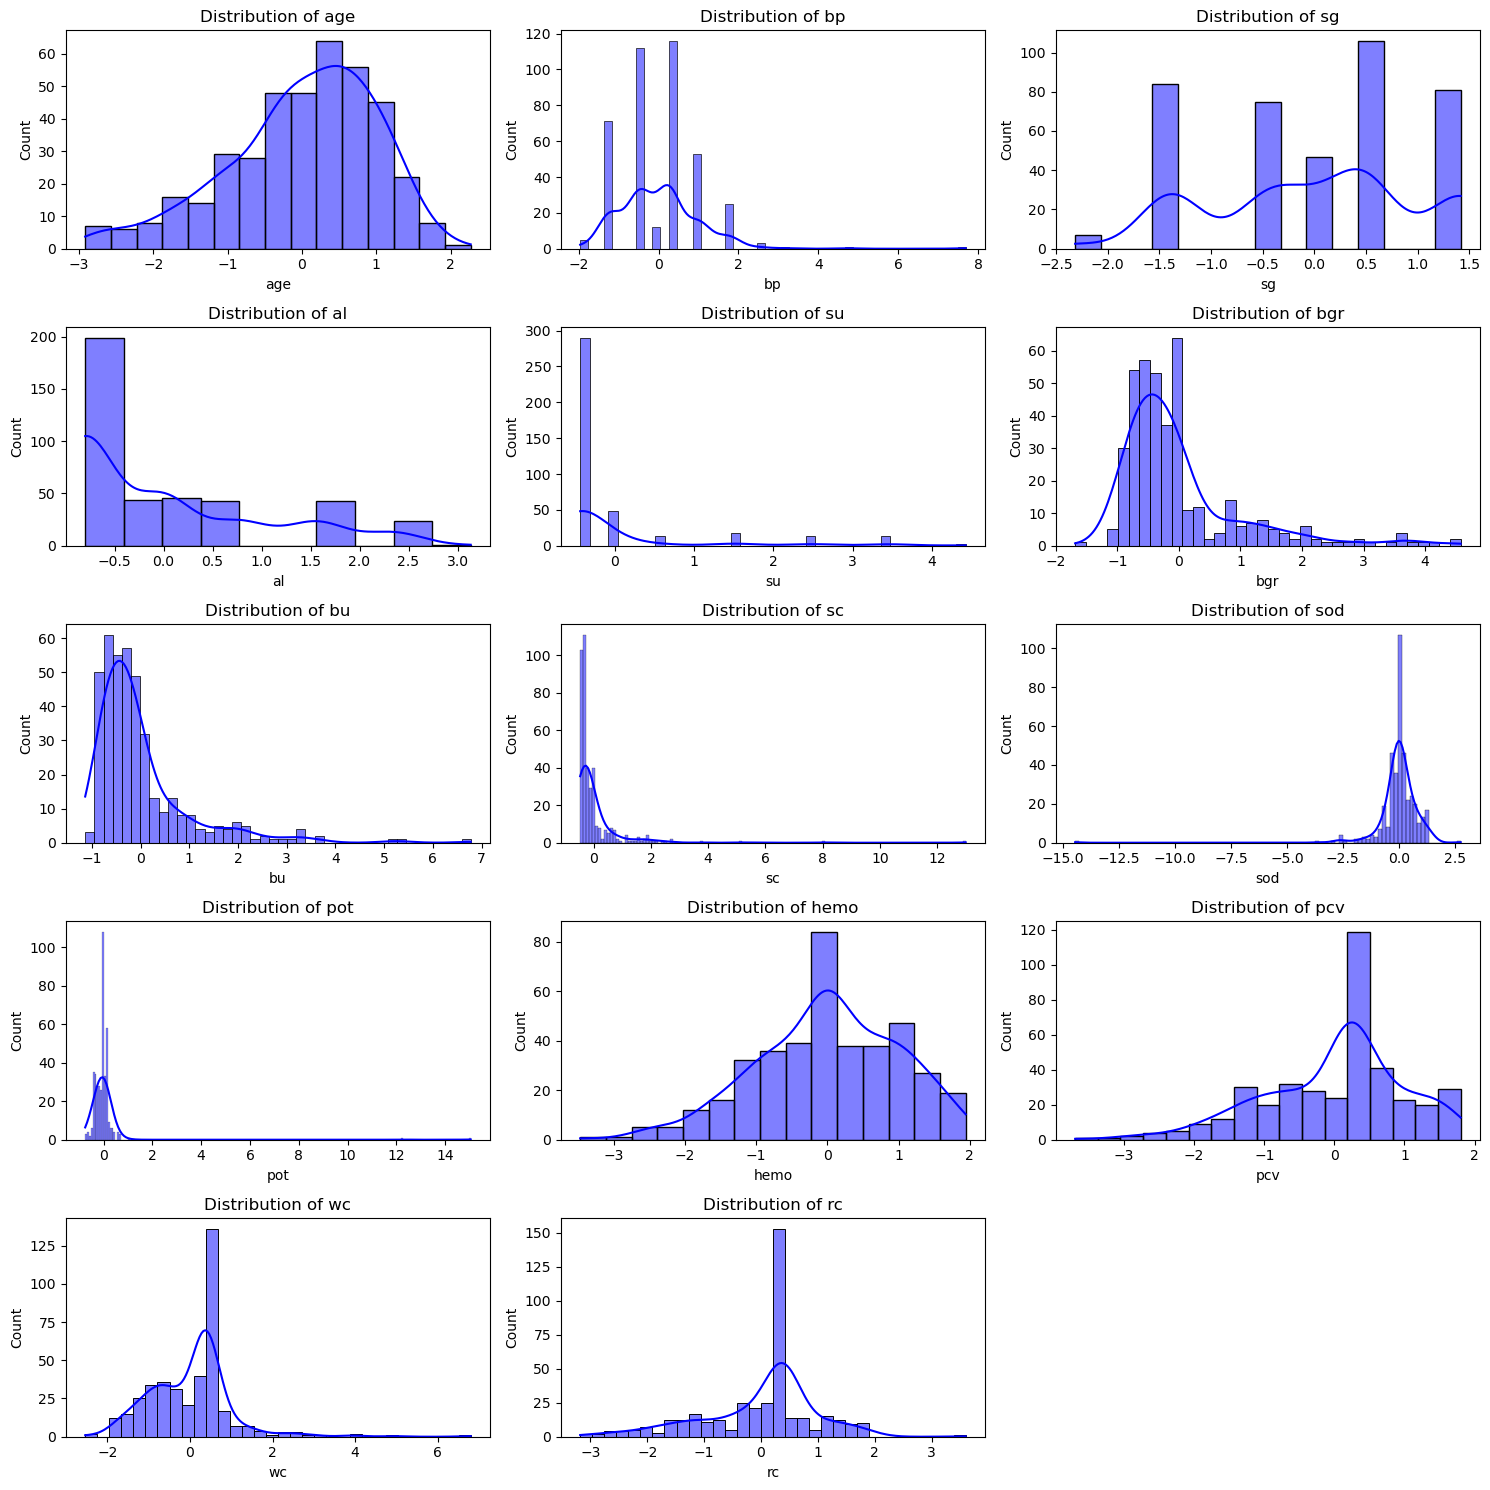

In [14]:
# Step 3: Distribution of Numerical Features
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

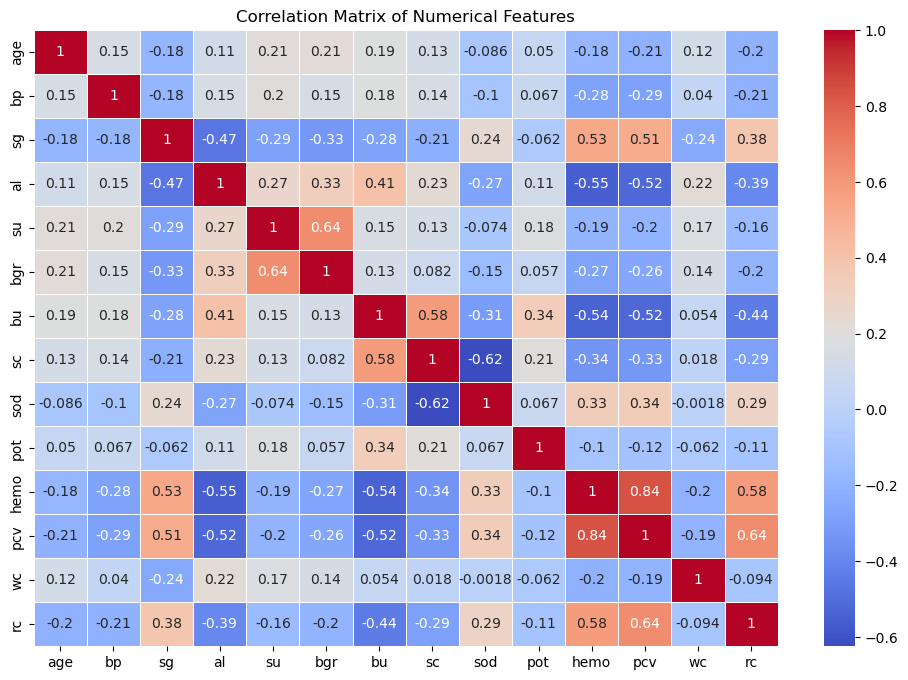

In [15]:
# Step 4: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

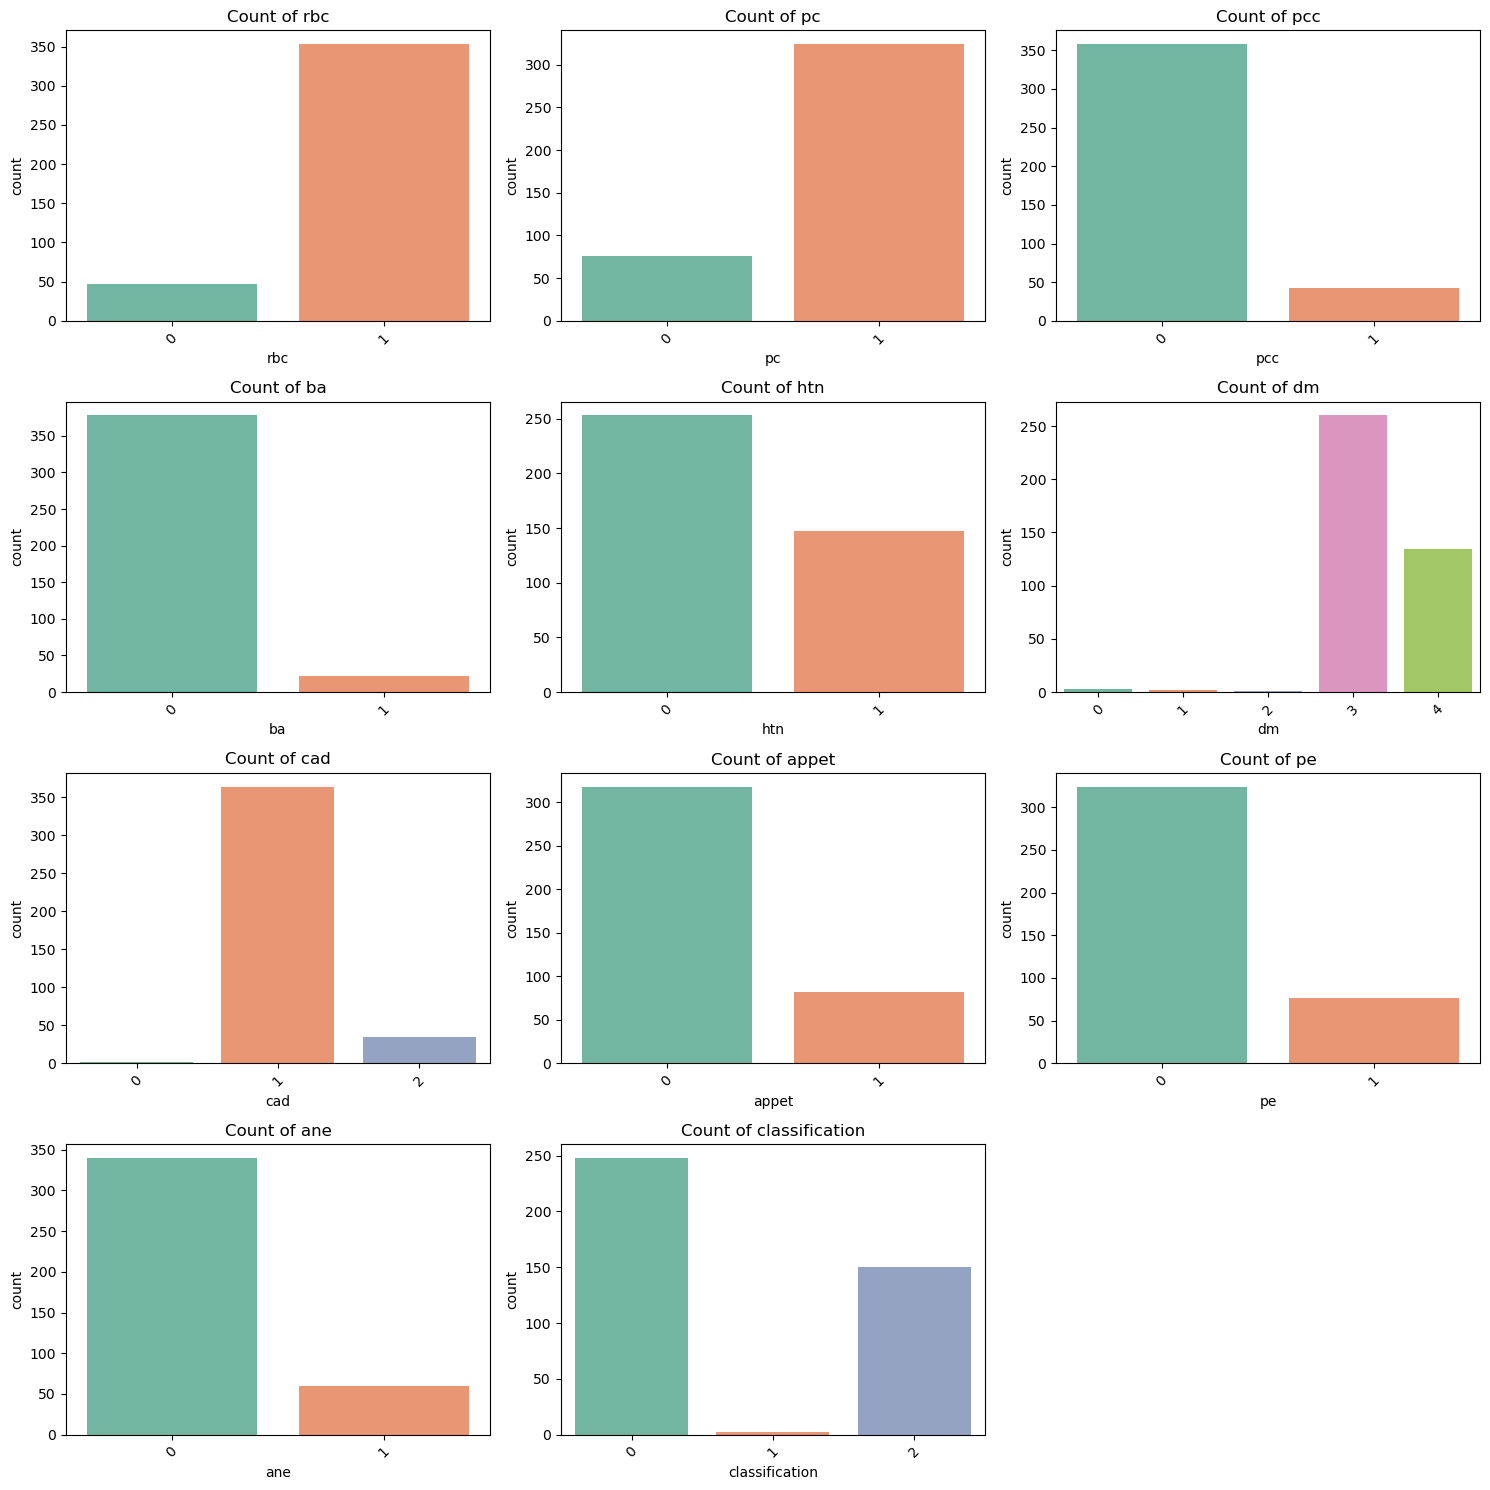

In [16]:
# Step 5: Distribution of Categorical Features (Bar Plots)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

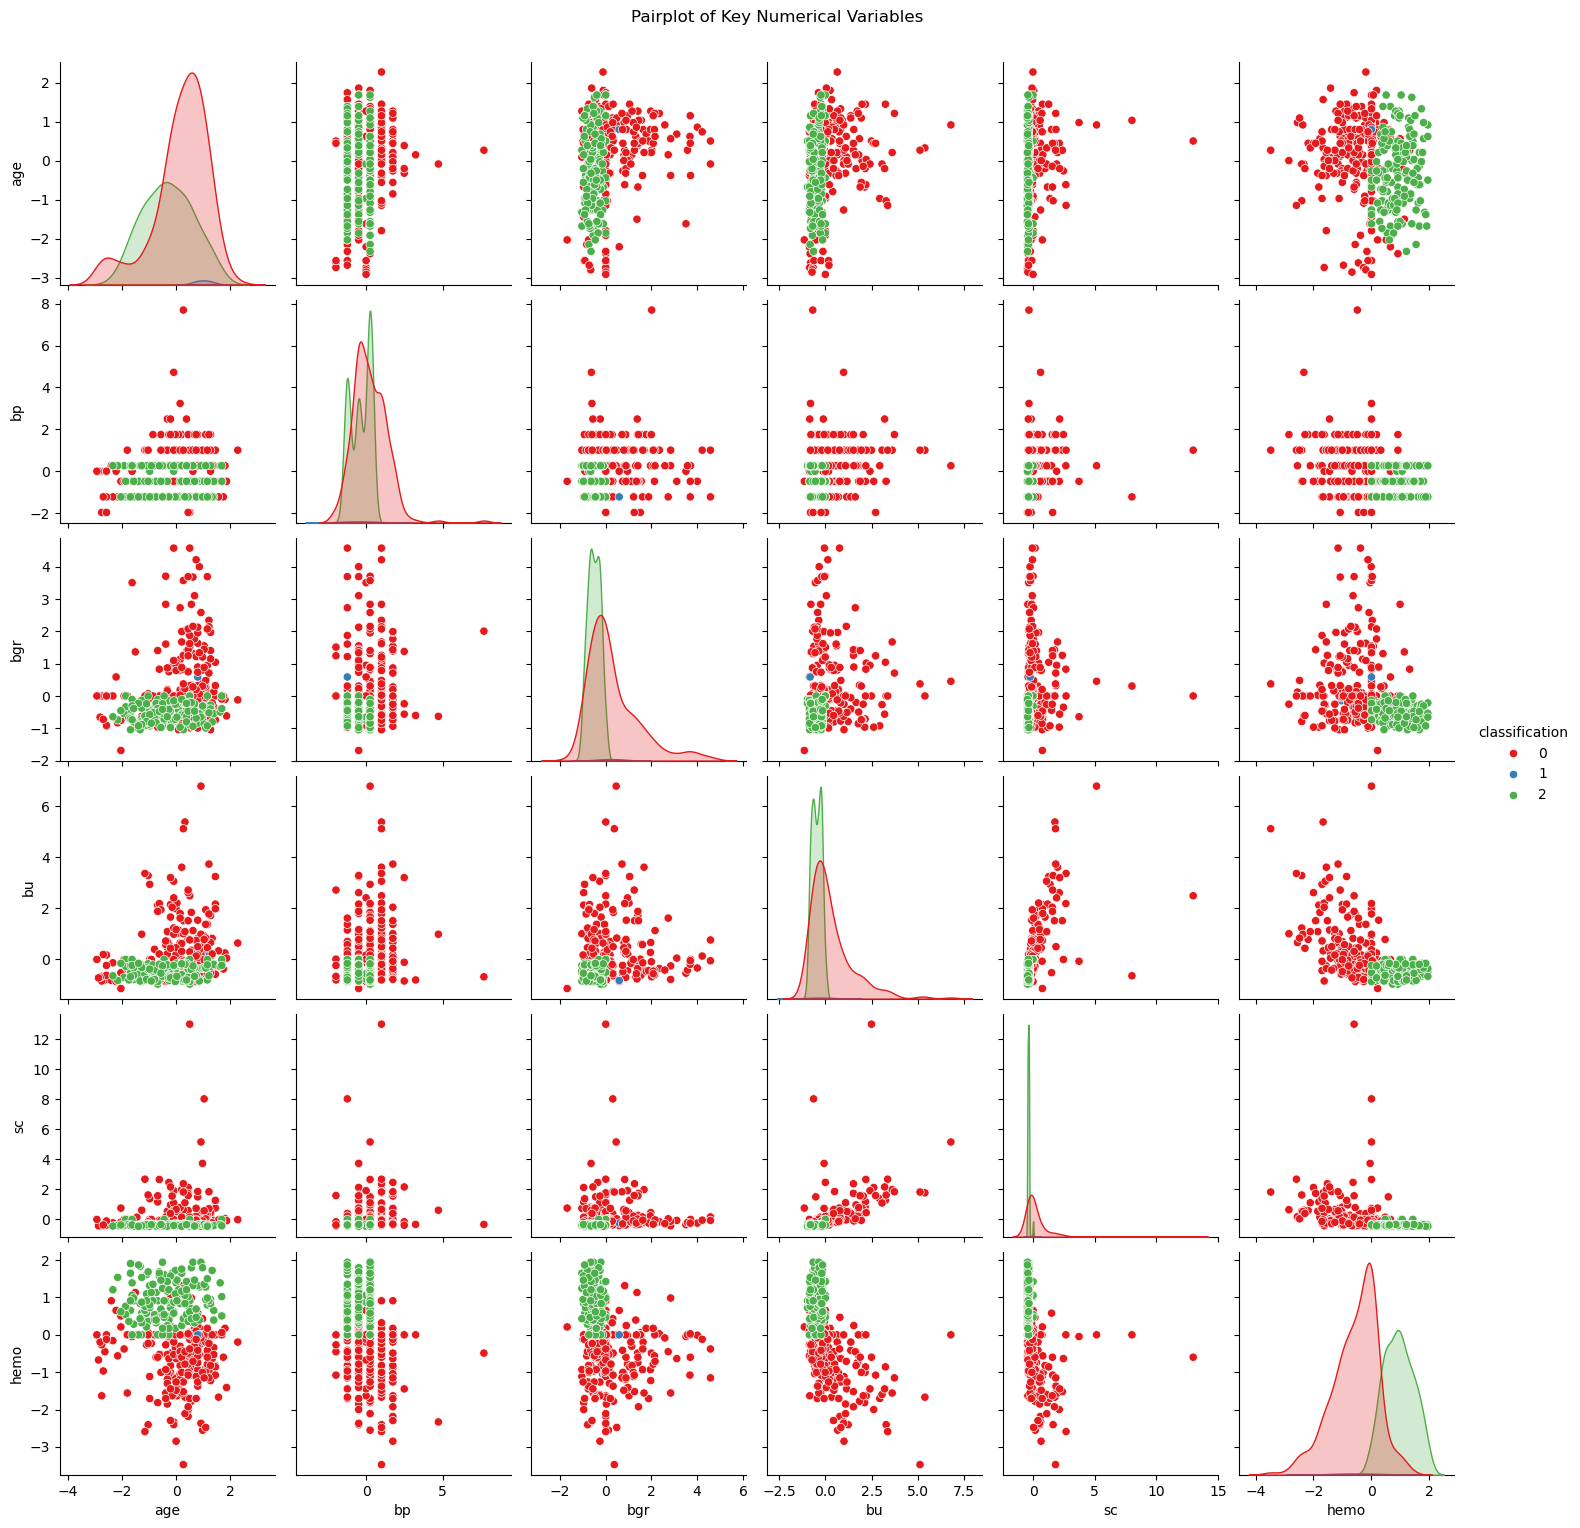

In [17]:
# Step 6: Pair Plot for Key Numerical Variables and Classification
sns.pairplot(df, vars=['age', 'bp', 'bgr', 'bu', 'sc', 'hemo'], hue='classification', diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Key Numerical Variables", y=1.02)
plt.show()

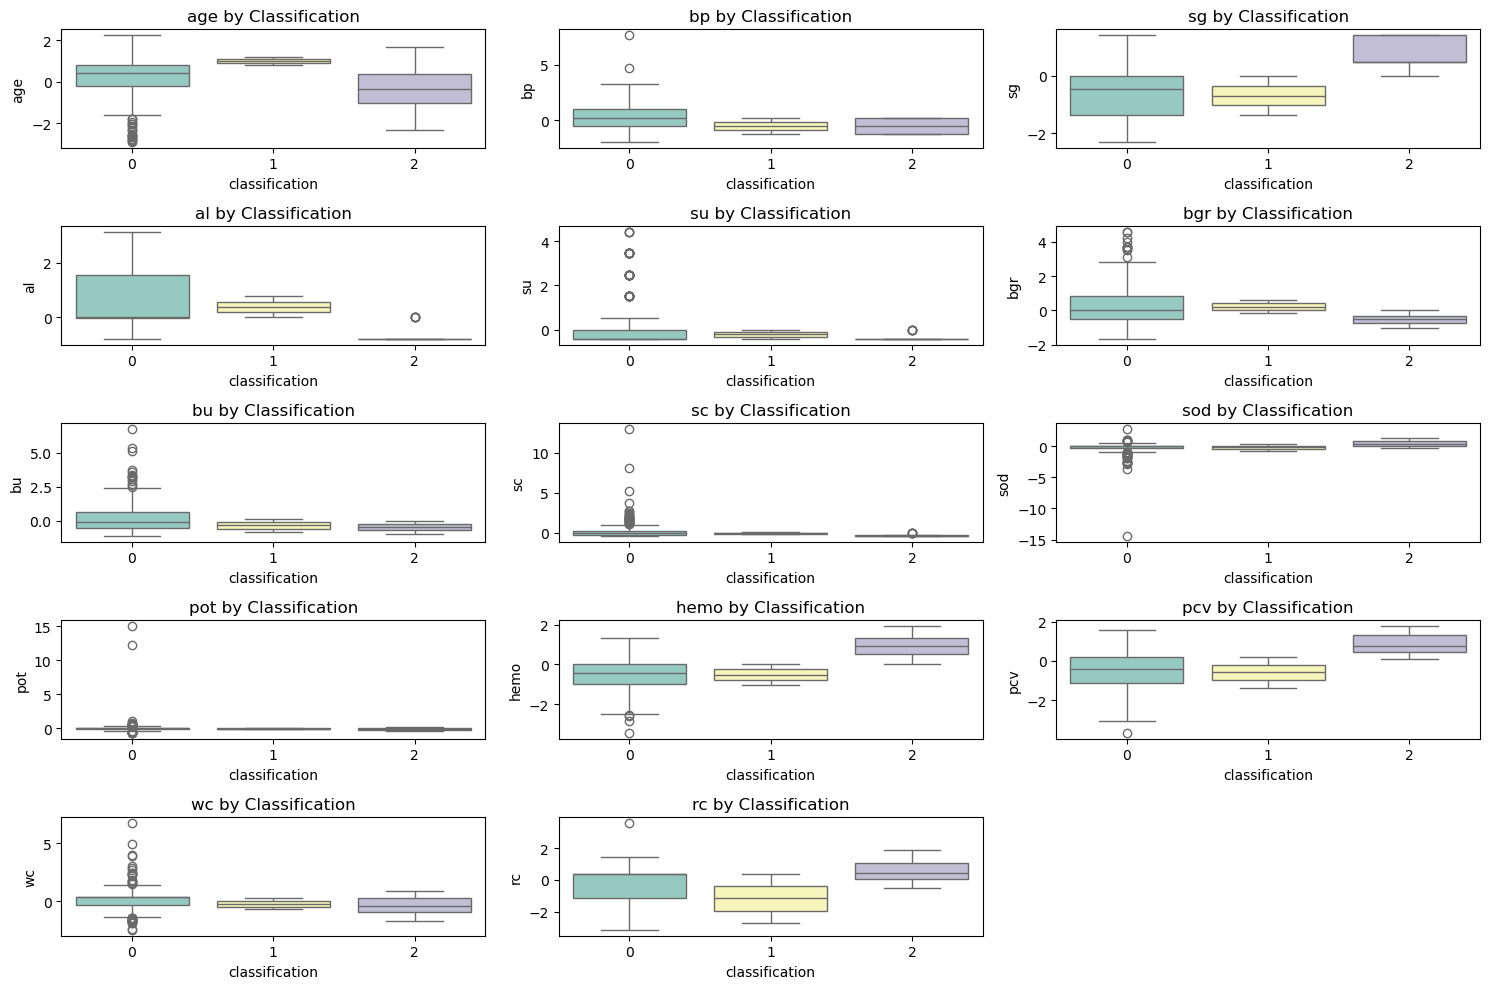

In [18]:
# Step 7: Box Plots to Visualize Distribution by 'classification'
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='classification', y=col, data=df, palette='Set3')
    plt.title(f'{col} by Classification')
plt.tight_layout()
plt.show()

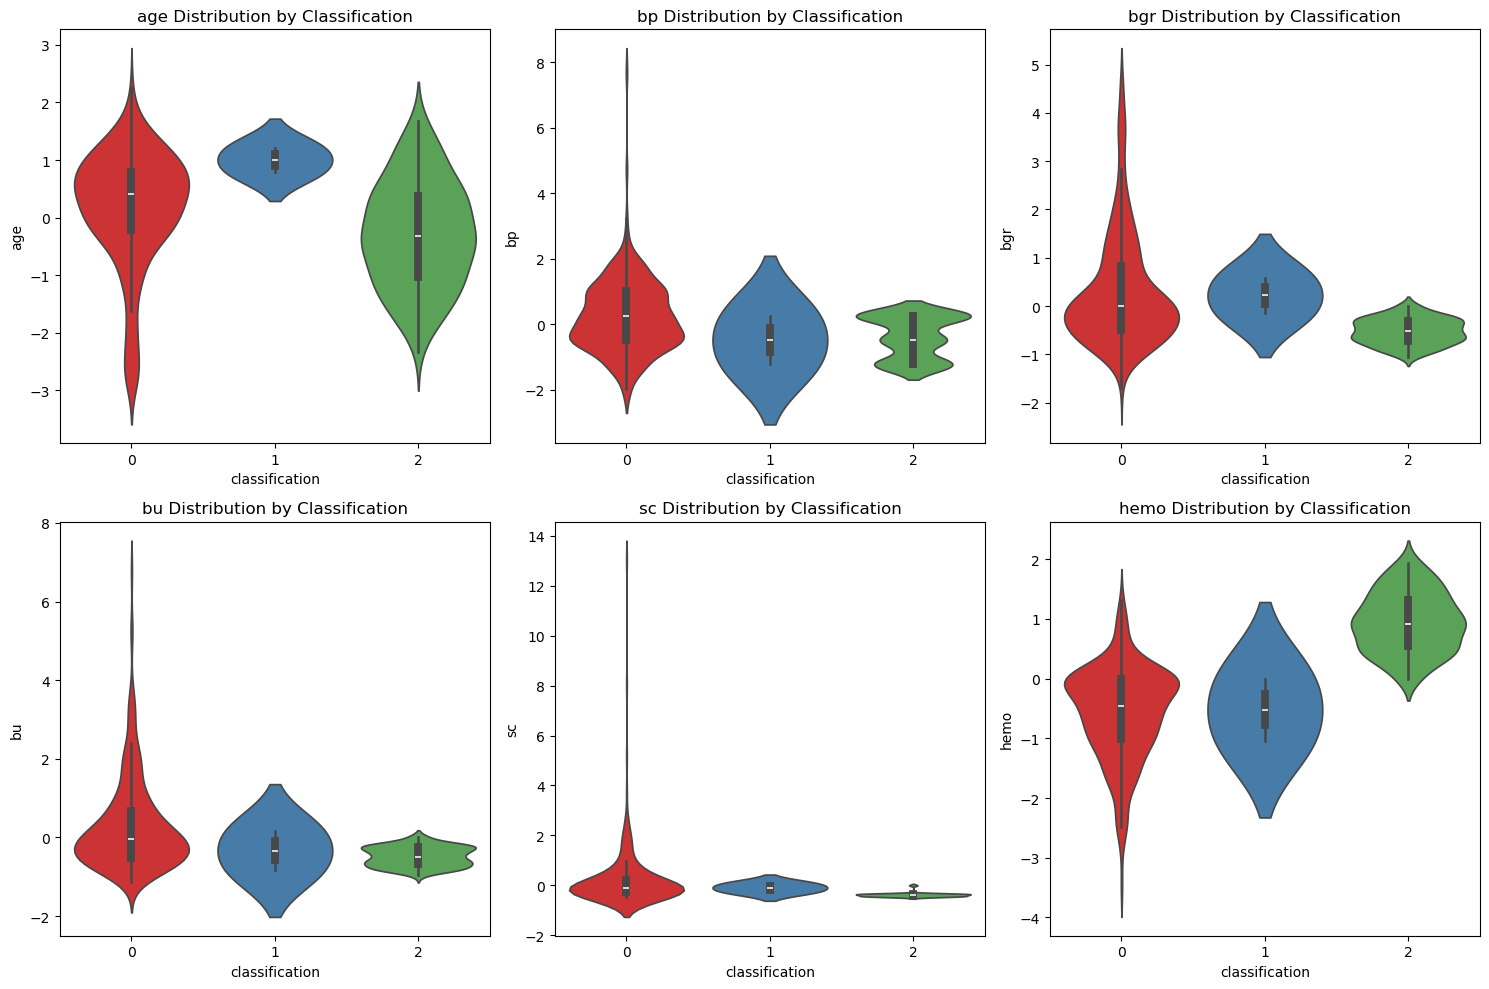

In [19]:
# Step 8: Violin Plots for Visualizing Distributions of Key Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'bp', 'bgr', 'bu', 'sc', 'hemo'], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='classification', y=col, data=df, palette='Set1')
    plt.title(f'{col} Distribution by Classification')
plt.tight_layout()
plt.show()

In [20]:
# Step 9: Analysis of Numerical Features by Grouping (Classification)
grouped = df.groupby('classification')[num_cols].mean()
print("\nMean of Numerical Features Grouped by Classification:\n", grouped)

# Step 10: Correlation between Key Features and Target (classification)
classification_corr = df.corr()['classification'].sort_values(ascending=False)
print("\nCorrelation with Classification:\n", classification_corr)


Mean of Numerical Features Grouped by Classification:
                      age        bp        sg        al        su       bgr  \
classification                                                               
0               0.167912  0.230789 -0.540206  0.464792  0.257735  0.311632   
1               1.003709 -0.480635 -0.690695  0.386807 -0.218898  0.220427   
2              -0.290997 -0.375163  0.902350 -0.773613 -0.423204 -0.518171   

                      bu        sc       sod       pot      hemo       pcv  \
classification                                                               
0               0.293190  0.230381 -0.265493  0.060428 -0.565524 -0.508265   
1              -0.333692 -0.093121 -0.220690 -0.045182 -0.520950 -0.581342   
2              -0.480292 -0.379655  0.441892 -0.099305  0.941946  0.848082   

                      wc        rc  
classification                      
0               0.227900 -0.339942  
1              -0.220906 -1.169541  
2             

<Figure size 800x600 with 0 Axes>

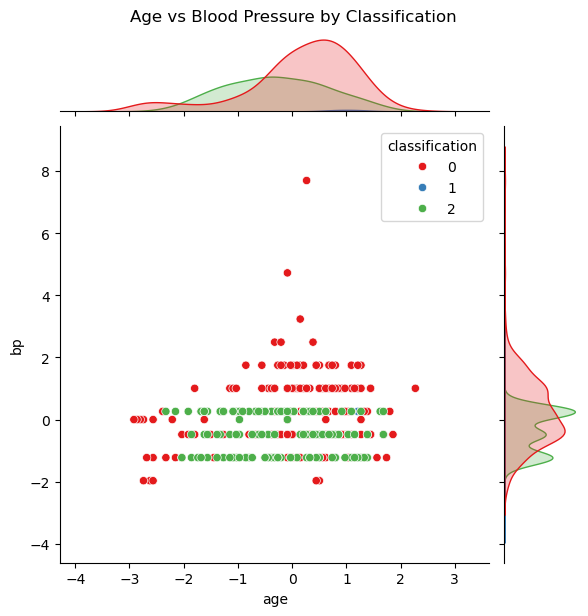

In [21]:
# Step 1: Joint Plot (Age vs Blood Pressure with Classification)
plt.figure(figsize=(8, 6))
sns.jointplot(x='age', y='bp', hue='classification', data=df, kind='scatter', palette='Set1', height=6)
plt.suptitle('Age vs Blood Pressure by Classification', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

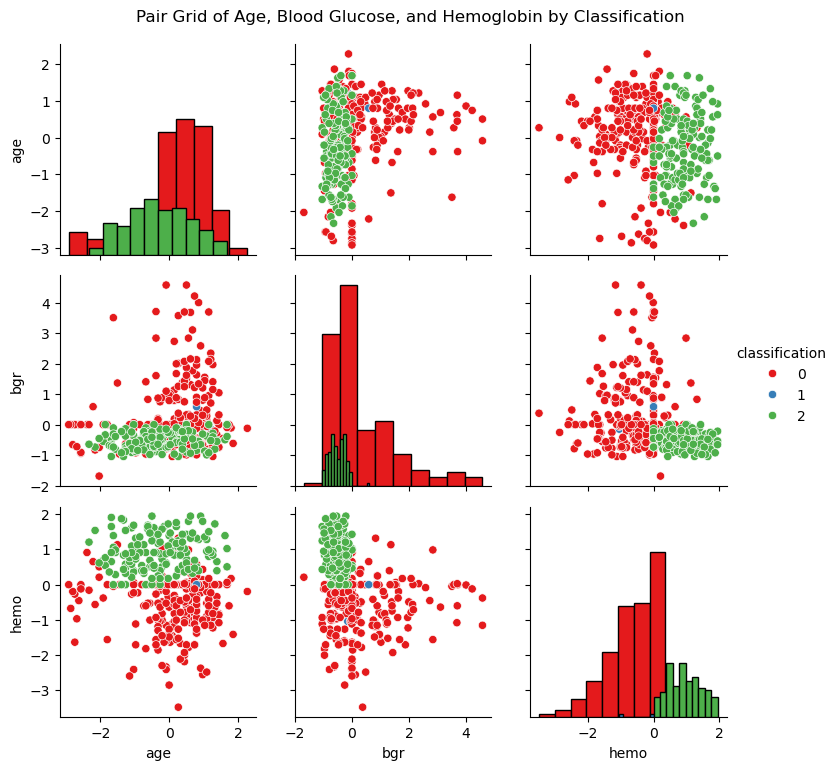

In [22]:
# Step 3: Pair Grid of Key Features (Categorical and Numerical) Colored by Classification
plt.figure(figsize=(8, 6))
g = sns.PairGrid(df, vars=['age', 'bgr', 'hemo'], hue="classification", palette="Set1")
g = g.map_diag(plt.hist, edgecolor='k')
g = g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle("Pair Grid of Age, Blood Glucose, and Hemoglobin by Classification", y=1.02)
plt.show()

In [23]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,1,1,0,0,...,0.579963,-0.375135,0.381544,1,4,1,0,0,0,0
1,1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,1,1,0,0,...,-0.153493,-1.069163,0.381544,0,3,1,0,0,0,0
2,2,0.620313,0.262338,-1.381391,0.773613,2.479925,1,1,0,0,...,-1.009191,-0.490806,0.381544,0,4,1,1,0,1,0
3,3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,1,0,1,0,...,-0.886948,-0.799263,-1.112094,1,3,1,1,1,1,0
4,4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,1,1,0,0,...,-0.520220,-0.567921,-0.307827,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.207425,0.262338,0.483355,-0.800290,-0.437797,1,1,0,0,...,0.946691,-0.799263,0.036859,0,3,1,0,0,0,2
396,396,-0.559368,-0.480635,1.415727,-0.800290,-0.437797,1,1,0,0,...,1.802389,-0.375135,1.530496,0,3,1,0,0,0,2
397,397,-2.328890,0.262338,0.483355,-0.800290,-0.437797,1,1,0,0,...,1.191176,-0.837821,0.611335,0,3,1,0,0,0,2
398,398,-2.033969,-1.223607,1.415727,-0.800290,-0.437797,1,1,0,0,...,1.435661,-0.606478,1.185811,0,3,1,0,0,0,2


### <i> Modeling </i>

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Step 1: Data Preparation (assuming the dataset is in 'df')
X = df.drop(columns=['classification'])  # Features
y = df['classification']  # Target

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Step 4.1: Logistic Regression
print("Logistic Regression Model:")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

Logistic Regression Model:


LogisticRegression()

In [27]:
log_reg.score(X_train,y_train)

0.99375

In [28]:
# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## <i>  Metrics: </i>
### <i> Precision: </i>
The proportion of positive predictions that are actually correct.

- **Class 0 (Label 0)**: Precision is 1.00, meaning 100% of the samples predicted as class 0 were correctly classified.
- **Class 2 (Label 2)**: Precision is 1.00, meaning 100% of the samples predicted as class 2 were also correctly classified.

### <i> Recall: </i>
The proportion of actual positive samples that were correctly predicted.

- **Class 0**: Recall is 1.00, meaning the model identified all actual class 0 instances correctly.
- **Class 2**: Recall is 1.00, meaning the model identified all actual class 2 instances correctly.

### <i> F1-score: </i>
The harmonic mean of precision and recall, balancing both metrics.

- **Class 0 and Class 2**: F1-score is 1.00 for both classes, which means the model has a perfect balance between precision and recall.

### <i> Support: </i>
The number of actual occurrences for each class in the test set.

- **Class 0**: 52 samples.
- **Class 2**: 28 samples.
- The model is balanced across the support, as both classes have been classified perfectly.

## <i> Averages: </i>
- **Accuracy**: 1.00, indicating that 100% of the test samples were classified correctly.
- **Macro average**: The unweighted mean of precision, recall, and F1-score across all classes. It’s 1.00, meaning the model performs equally well across both classes.
- **Weighted average**: This is similar to macro average, but it considers the support (number of samples) for each class. It’s also 1.00, indicating excellent overall performance.

## <i> Summary: </i>
- **Is this good or bad?**: This is excellent. A perfect classification report like this (precision, recall, and F1-scores all being 1.00) means that your logistic regression model classified all samples correctly with no mistakes.
- **However**, it’s important to consider if this result might be due to overfitting, especially if the dataset is small or imbalanced. Always check if this performance generalizes well to unseen data by evaluating on larger or more diverse datasets.
